In [2]:
%matplotlib inline
from matplotlib import rcParams

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering? 
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

*Answer here*  
<font color="#B43757">
Clustering : permet de définir des groupes d'individus parmis les données, sans connaître à l'avance/donner à l'avance les classes.

Main steps : extraire les features d'intérêt pour rassembler/séparer les individus, choisir le bon algorithme, évaluer l'algo et les résultats, interprétation.

Silhouette coefficient : permet de juger le "bon classement" d'un individu, avec la différence entre sa distance moy avec les indiv du même groupe et sa distance moyenne avec les indiv d'un autre groupe. 

Evaluation : soit interne avec les données de train, soit externe avec les données de test. Il y a plusieurs métriques pour chaque catégorie. 

</font>

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [4]:
import pandas as pd
# code here
df = pd.read_csv("../data/bank-full.csv", sep=";")

Print a summary of the data as well as the first 5 rows.

In [5]:
# code here
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [106]:
from sklearn.preprocessing import StandardScaler

# code here
def table_variable_attributes(df : pd.DataFrame) -> pd.DataFrame:
    """Création table avec attributs des variables et % de valeurs manquantes"""
    df_temp = (pd.DataFrame(
        {
            'variable' : df.isna().describe(include="all").columns,
            'count' : df.isna().describe(include="all").loc['count'].astype(float),
            'unique' : df.isna().describe(include="all").loc['unique'].astype(float),
            'top' : df.isna().describe(include="all").loc['top'].astype(str),
            'freq_top' : df.isna().describe(include="all").loc['freq'].astype(float)
        }
    )
    .assign(percent_top=lambda df : df['freq_top']/df['count'])
    .reset_index()
    .assign(percent_na = lambda df : [df.loc[:,'percent_top'][row] if df['top'][row]=='True' else 1-df['percent_top'][row] for row in df.index] )
    .drop(columns=['percent_top', 'index', 'unique', 'top', 'freq_top'])
    .assign(percent_na=lambda df : round(df['percent_na']*100, 0),
            count=lambda df : df['count'].astype(int))
    .assign(type_variable = df.dtypes.astype(str).tolist())
    )
    return df_temp

df_clean = (
    df
        .select_dtypes(include='number')
        .drop(columns= ["day"])
)


table_variable_attributes(df_clean)

scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anacond

Plot histograms of features

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/

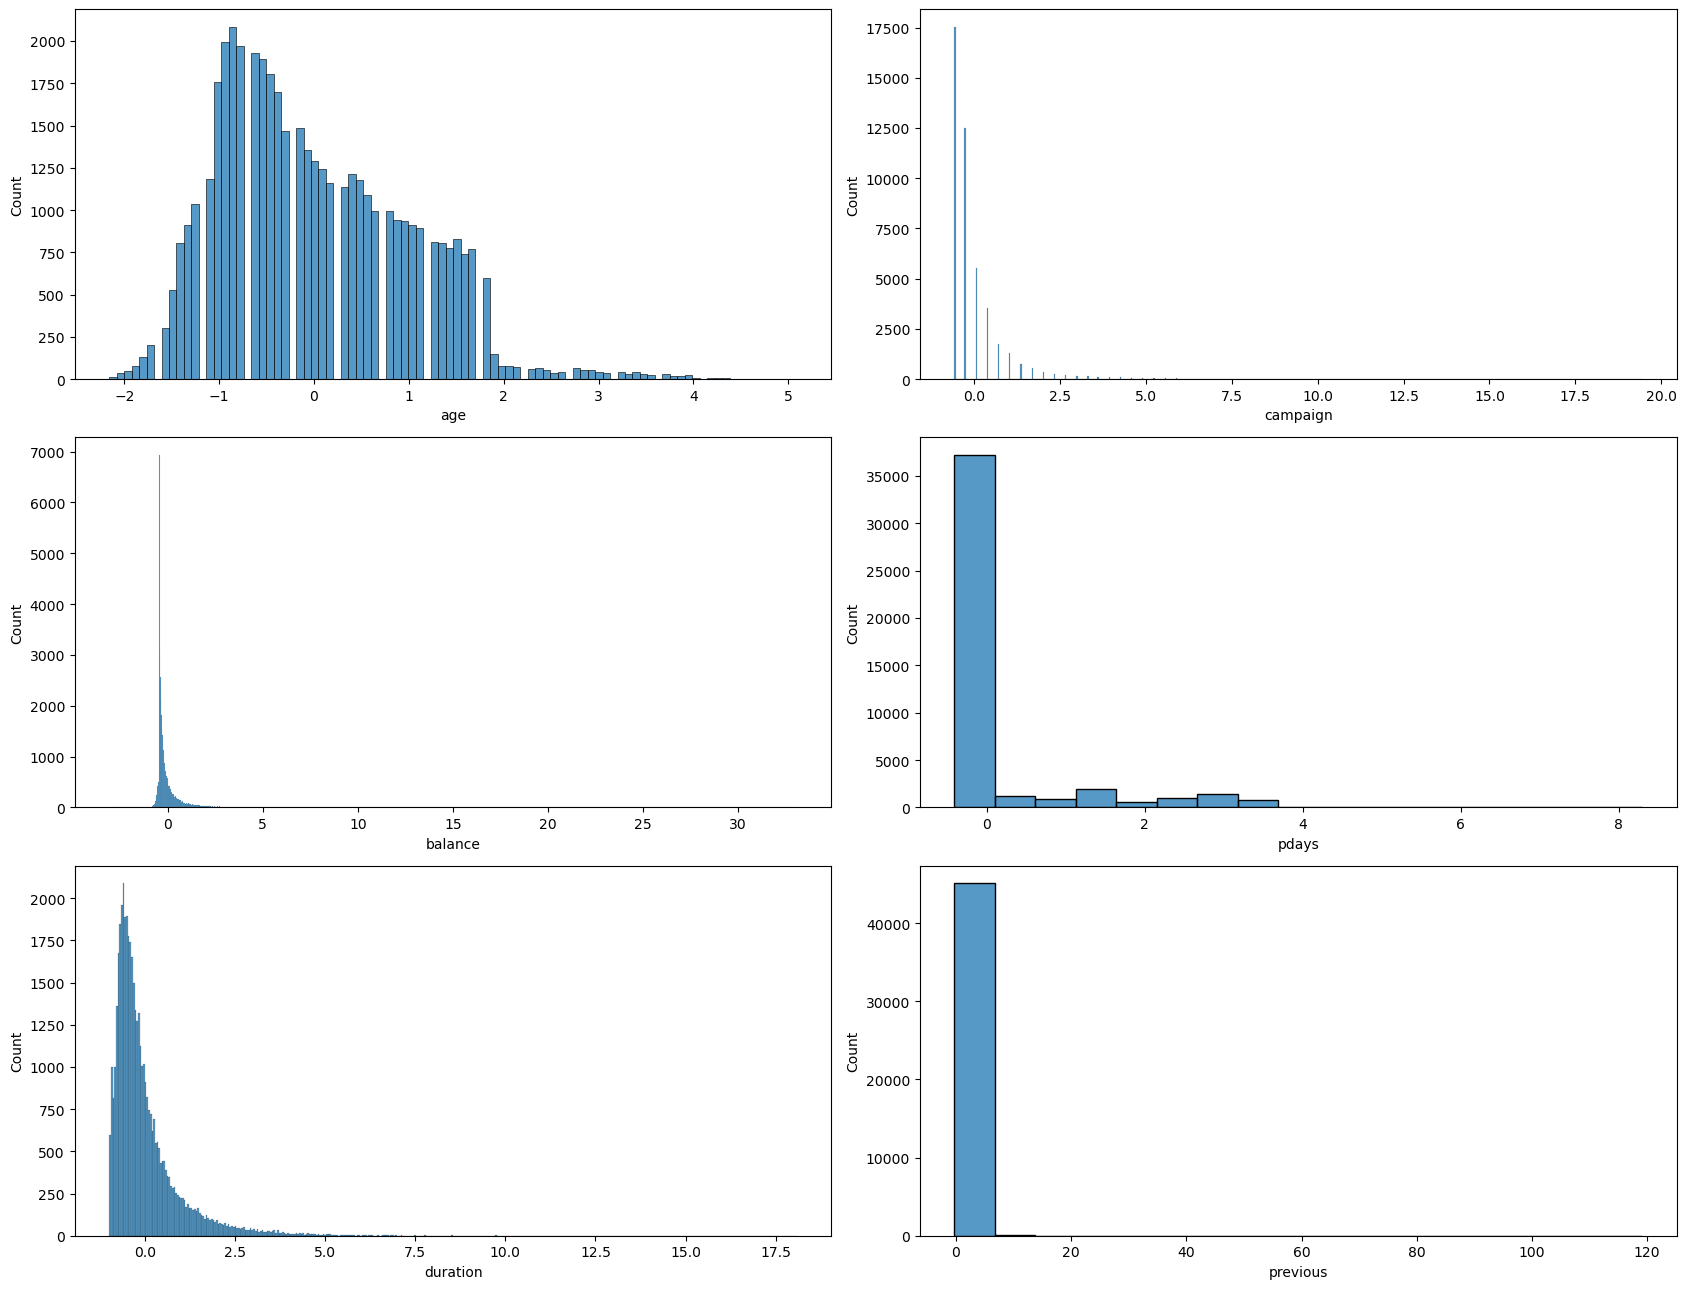

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# code here
f, axes = plt.subplots(3,2,figsize=(17,13), sharex=False)
for i, feature in enumerate(df_norm.columns.values):
    sns.histplot(data=df_norm, x=feature, ax=axes[i%3, i//3])
    
plt.tight_layout()
plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


*Answer here*

<font color="#B43757">

Centroid : vecteur qui représente une classe, avec des valeurs moyennes de tous les individus de la classe.  

Faire un centroide : génération de k valeurs aléatoires, prendre leur moyenne, répartir tous les points dans ces k classes selon la moy, calculer les centroïdes, re-calculer les distances entre les points et les centroides, etc etc  

Oui on doit donner le nombre de clusters mais il y a des manières de calculer lesquels sont importants. 

</font>


#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [108]:
# code here
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [109]:
# code here
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto', verbose=2)
kmeans.fit(df_norm)

Initialization complete
Iteration 0, inertia 183845.9806775717.
Iteration 1, inertia 153173.7854868003.
Iteration 2, inertia 149159.3858741102.
Iteration 3, inertia 148004.9413933613.
Iteration 4, inertia 147625.32128052262.
Iteration 5, inertia 147485.09919311825.
Iteration 6, inertia 147404.886343422.
Iteration 7, inertia 147338.83593135604.
Iteration 8, inertia 147277.42589652754.
Iteration 9, inertia 147218.1502185583.
Iteration 10, inertia 147154.7991262525.
Iteration 11, inertia 147082.4298456534.
Iteration 12, inertia 146975.70217344773.
Iteration 13, inertia 146890.65775977037.
Iteration 14, inertia 146865.22262251182.
Iteration 15, inertia 146859.65719981136.
Iteration 16, inertia 146858.2263251458.
Converged at iteration 16: center shift 3.5509542590685864e-05 within tolerance 0.00010000000000000194.


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KMeans(n_clusters=5, n_init='auto', random_state=0, verbose=2)

Print the centroids obtained

In [110]:
# code here
kmeans.cluster_centers_

array([[ 1.10203154,  0.2318316 , -0.2362525 , -0.10590748, -0.32652566,
        -0.18523561],
       [-0.6454036 , -0.14694857, -0.2226992 , -0.15673014, -0.37492239,
        -0.220143  ],
       [-0.06290567,  0.05023213,  2.57085766, -0.10894155, -0.25863085,
        -0.15606774],
       [-0.06737574, -0.08675053, -0.45180673,  3.92080683, -0.39988827,
        -0.24060095],
       [-0.14802416, -0.01076914, -0.09604359, -0.20782762,  2.2308911 ,
         1.29979922]])

Print the cluster labels assigned to each point

In [111]:
# code here
df_norm_cluster = pd.concat([df_norm, pd.DataFrame(kmeans.predict(df_norm))], axis=1).rename(columns={0:"predicted_cluster"})
df_norm_cluster

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,age,balance,duration,campaign,pdays,previous,predicted_cluster
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,1
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,1
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,1
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,2
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,2
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0


### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anacond

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


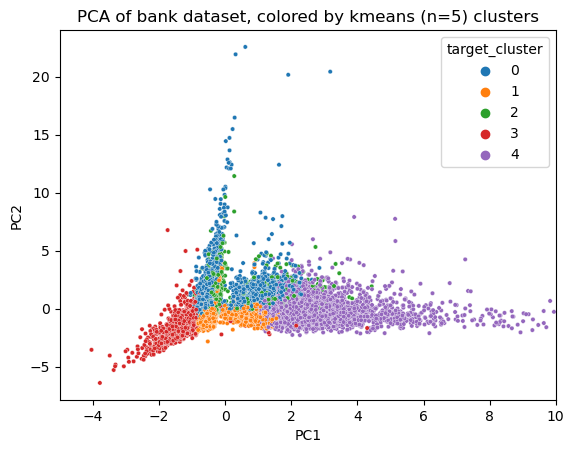

In [154]:
# code here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_norm_r = pca.fit(df_norm).transform(df_norm)
df_norm_r2 = pd.DataFrame(df_norm_r).rename(columns={0:"PC1", 1:'PC2'}).assign(target_cluster=df_norm_cluster["predicted_cluster"].astype(str))


sns.scatterplot(data=df_norm_r2, x="PC1", y="PC2", hue="target_cluster", s=10)
plt.xlim(-5,10)
plt.title("PCA of bank dataset, colored by kmeans (n=5) clusters")
plt.show()

In [113]:
# df_norm_r2.loc[df_norm_r2["PC1"]>60,]

In [114]:
df_norm_cluster.iloc[29182]

age                   -0.088167
balance               -0.269079
duration               0.352731
campaign              -0.246560
pdays                  2.215194
previous             119.135982
predicted_cluster      4.000000
Name: 29182, dtype: float64

In [115]:
df_norm_cluster.loc[df_norm_cluster["predicted_cluster"]==4,:]

,age,balance,duration,campaign,pdays,previous,predicted_cluster
24060,-0.747384,-0.157739,-0.851036,-0.569351,1.106609,1.050473,4
24062,0.100181,-0.528543,1.012861,-0.569351,1.256418,0.182198,4
24064,-0.747384,0.683715,-0.443309,-0.569351,0.507374,1.484611,4
24072,-0.464863,0.345754,-0.719010,-0.569351,0.457438,1.484611,4
24077,-0.464863,-0.447419,-0.458841,-0.569351,1.026711,1.050473,4
...,...,...,...,...,...,...,...
45194,1.701139,-0.402095,-0.373413,-0.246560,1.466150,1.918749,4
45195,2.548705,-0.071032,-0.179257,-0.569351,1.466150,2.352887,4
45199,-0.653211,0.037024,3.525239,0.076230,4.891778,4.957714,4
45201,1.136095,-0.255941,-0.124893,-0.569351,1.436189,1.484611,4


### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [116]:
# code here
kmeans.inertia_

146857.58618245588

In [117]:
df_norm_cluster

,age,balance,duration,campaign,pdays,previous,predicted_cluster
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,1
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,1
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,1
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,2
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,2
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0


In [118]:
kmeans.cluster_centers_

array([[ 1.10203154,  0.2318316 , -0.2362525 , -0.10590748, -0.32652566,
        -0.18523561],
       [-0.6454036 , -0.14694857, -0.2226992 , -0.15673014, -0.37492239,
        -0.220143  ],
       [-0.06290567,  0.05023213,  2.57085766, -0.10894155, -0.25863085,
        -0.15606774],
       [-0.06737574, -0.08675053, -0.45180673,  3.92080683, -0.39988827,
        -0.24060095],
       [-0.14802416, -0.01076914, -0.09604359, -0.20782762,  2.2308911 ,
         1.29979922]])

In [119]:
df_norm_cluster_distance = pd.concat([pd.DataFrame(kmeans.transform(df_norm)),df_norm_cluster["predicted_cluster"] ], axis=1)
df_norm_cluster_distance

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,0,1,2,3,4,predicted_cluster
0,0.736984,2.337326,3.102949,4.826714,3.561378,0
1,1.170092,1.080230,3.086806,4.518077,3.161652,1
2,2.080676,0.712591,3.421513,4.562796,3.231657,1
3,0.842456,1.366965,3.315065,4.541445,3.215994,0
4,2.026752,0.522691,2.970768,4.560881,3.176337,1
...,...,...,...,...,...,...
45206,3.066202,3.417599,1.090069,5.132006,4.362987,2
45207,2.010707,3.626404,3.417880,5.224989,4.362510,0
45208,4.807392,5.816987,4.061481,6.415830,5.011818,2
45209,1.449898,2.529518,2.326606,4.116076,3.701407,0


In [120]:
import numpy as np
pd.DataFrame(np.transpose(kmeans.cluster_centers_))
#colonne=feature
#ligne=cluster

df_norm_cluster_distance.loc[df_norm_cluster_distance['predicted_cluster']==0,:]

,0,1,2,3,4,predicted_cluster
0,0.736984,2.337326,3.102949,4.826714,3.561378,0
3,0.842456,1.366965,3.315065,4.541445,3.215994,0
8,1.103466,2.378382,3.829037,4.816149,3.642175,0
12,1.492398,2.223268,2.092711,4.884807,3.545559,0
13,1.073434,2.361498,3.759305,4.811923,3.628944,0
...,...,...,...,...,...,...
45186,1.510926,2.744469,3.302044,5.040281,2.567662,0
45191,2.871756,4.402830,4.578684,5.950930,3.737067,0
45204,3.978133,5.112367,5.213233,6.522369,4.376977,0
45207,2.010707,3.626404,3.417880,5.224989,4.362510,0


In [88]:
def calculate_inertia_within_cluster(df : pd.DataFrame, n_cluster : int) -> pd.DataFrame:
    centre = pd.DataFrame((kmeans.cluster_centers_))[n_cluster]
    df_temp = (df
    .loc[df['predicted_cluster']==n_cluster,:]
    .assign(
        sq_dist_centre_0=lambda df : [(df[0][row]-centre[0])**2 for row in df.index.values],
        sq_dist_centre_1=lambda df : [(df[1][row]-centre[1])**2 for row in df.index.values],
        sq_dist_centre_2=lambda df : [(df[2][row]-centre[2])**2 for row in df.index.values],
        sq_dist_centre_3=lambda df : [(df[3][row]-centre[3])**2 for row in df.index.values],
        sq_dist_centre_4=lambda df : [(df[4][row]-centre[4])**2 for row in df.index.values]
    )
    )
    df_sum = pd.DataFrame(df_temp.loc[:, 'sq_dist_centre_0':].sum(axis=0), columns=[f'cluster_{n_cluster}'])
    return df_sum
# pd.DataFrame((kmeans.cluster_centers_))[n_cluster=0][n_feature=0]
df_sum_squared_by_feature = pd.concat(
    [calculate_inertia_within_cluster(df_norm_cluster_distance, 0),
     calculate_inertia_within_cluster(df_norm_cluster_distance, 1),
     calculate_inertia_within_cluster(df_norm_cluster_distance, 2),
     calculate_inertia_within_cluster(df_norm_cluster_distance, 3),
     calculate_inertia_within_cluster(df_norm_cluster_distance, 4),
     calculate_inertia_within_cluster(df_norm_cluster_distance, 5)

    ], axis=1
)

df_sum_squared_by_feature

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
sq_dist_centre_0,172.339394,755.112826,384.704971,6352.640826,1812.289616,0.0
sq_dist_centre_1,2734.000566,16335.850027,11259.467361,8701.838605,2467.413791,0.0
sq_dist_centre_2,2462.116158,28693.847160,4649.862774,2914.176012,2117.610754,0.0
sq_dist_centre_3,17702.630509,157994.686036,3867.815801,294.570423,3866.269619,0.0
sq_dist_centre_4,5030.807905,11747.054981,2658.378040,4709.787129,305.281915,0.0


In [103]:
pd.concat(
    [df_sum_squared_by_feature,
     np.transpose(pd.DataFrame(df_sum_squared_by_feature.sum(axis=0)))
     ], axis=0
).assign(index=['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'sum_f']).set_index(keys='index')


,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
index,,,,,,
f_0,172.339394,755.112826,384.704971,6352.640826,1812.289616,0.0
f_1,2734.000566,16335.850027,11259.467361,8701.838605,2467.413791,0.0
f_2,2462.116158,28693.847160,4649.862774,2914.176012,2117.610754,0.0
f_3,17702.630509,157994.686036,3867.815801,294.570423,3866.269619,0.0
f_4,5030.807905,11747.054981,2658.378040,4709.787129,305.281915,0.0
sum_f,28101.894532,215526.551030,22820.228947,22973.012995,10568.865695,0.0


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [52]:
# code here
from sklearn.metrics import silhouette_score

silhouette_score(kmeans.transform(df_norm), kmeans.labels_)

#si le coeff est <0 alors les points sont + proches de ceux d'une autre classe alors que si >0 alors points plus proches de leur propre classe

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.6269307423710004

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [126]:
# code here
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

X = df_norm
silhouette_avg = []

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=n_cluster, n_init="auto", random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

silhouette_avg

# plt.show()

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anacond

[0.39854256512602615,
 0.40596508657852726,
 0.4170138993923218,
 0.28301414102148625,
 0.27070666499111784]

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/

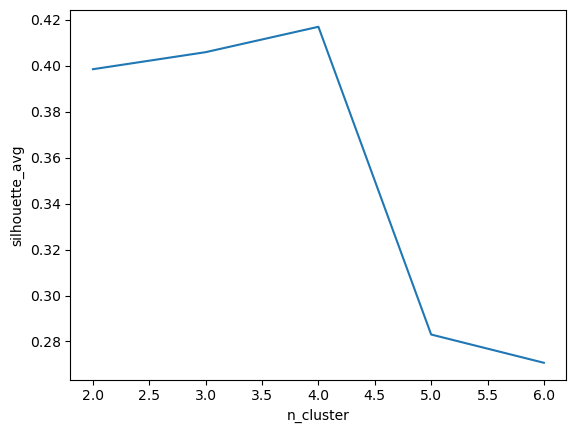

In [133]:
sns.lineplot(x=range_n_clusters, y=silhouette_avg)
plt.xlabel("n_cluster")
plt.ylabel('silhouette_avg')
plt.show()

Plot histograms of features

What is the optimal number of clusters that you obtained?

*Answer here*

<font color="red">

4
</font>

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


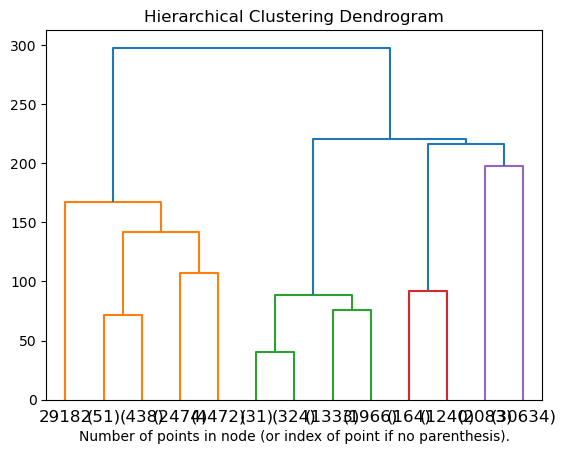

In [134]:
# code here
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering



def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
X = df_norm

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

How many clusters did you find?

*Answer here*

<font color='red'>

4

</font>

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [150]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df_norm)
labels = clustering_model.labels_


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


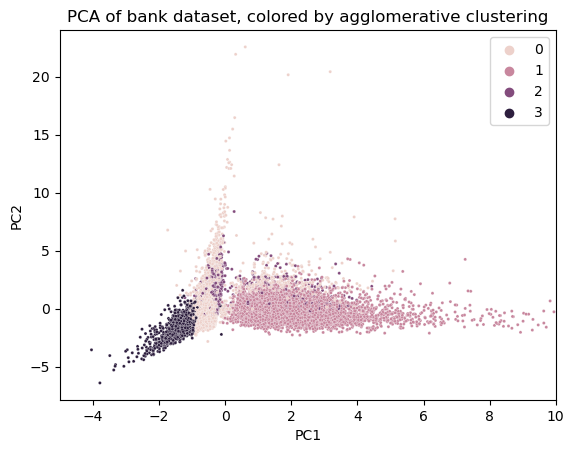

In [156]:
sns.scatterplot(data=df_norm_r2, x="PC1", y="PC2", hue=labels, s=5)
plt.title("PCA of bank dataset, colored by agglomerative clustering")
plt.xlim(-5,10)
plt.show()

In [157]:
# code here

df_norm_cluster.rename(columns={'predicted_cluster':'predicted_cluster_kmean'}).assign(predicted_cluster_agloclust=labels)

,age,balance,duration,campaign,pdays,previous,predicted_cluster_kmean,predicted_cluster_agloclust
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0,0
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,1,0
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,1,0
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0,0
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,1,0
...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,2,2
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0,0
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,2,2
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0,0


## Métriques de clustering 

Pour k de 2 à 10, faire kmean puis évaluer avec différentes métriques : silhouette score, metrics.calinski_harabasz_score, et metrics.davies_bouldin_score


In [158]:
df_norm

,age,balance,duration,campaign,pdays,previous
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940


In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

n_cluster_range = [2,3,4,5,6,8,10]

silhouette_sc = []
ch_sc=[]
db_score = []

for n_cluster in n_cluster_range:
    clusterer = KMeans(n_clusters=n_cluster, n_init="auto", random_state=42)
    cluster_labels = clusterer.fit_predict(df_norm)
    silhouette_sc.append(silhouette_score(df_norm, cluster_labels))
    ch_sc.append(calinski_harabasz_score(df_norm, cluster_labels))
    db_score.append(davies_bouldin_score(df_norm, cluster_labels))


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anacond

/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anacond

In [164]:
silhouette_sc

[0.39854256512602615,
 0.40596508657852726,
 0.4170138993923218,
 0.28301414102148625,
 0.27070666499111784,
 0.31325358947956133,
 0.32341940779964795]

In [165]:
ch_sc

[10109.398662779053,
 8705.717701864509,
 8517.431433424219,
 9428.879433433254,
 8374.779859478313,
 10223.157355783758,
 10377.909749401582]

In [166]:
kmeans_metrics = pd.DataFrame(
    {
        'n_value' : n_cluster_range,
        "silhouette_sc" : silhouette_sc,
        "ch_sc" : ch_sc,
        "db_score" : db_score
    }
)

kmeans_metrics

,n_value,silhouette_sc,ch_sc,db_score
0,2,0.398543,10109.398663,1.328529
1,3,0.405965,8705.717702,1.189297
2,4,0.417014,8517.431433,1.091782
3,5,0.283014,9428.879433,1.098312
4,6,0.270707,8374.779859,1.089805
5,8,0.313254,10223.157356,0.844660
6,10,0.323419,10377.909749,0.866805


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/

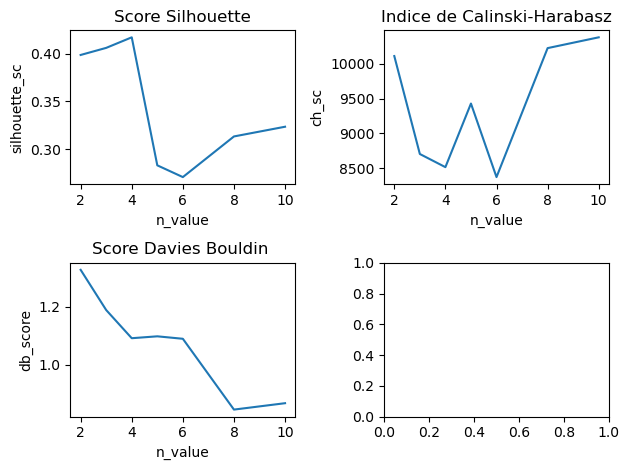

In [179]:
# kmeans_metrics_long = kmeans_metrics.melt(id_vars=['n_value'])

fig,axes = plt.subplots(2,2)

sns.lineplot(data=kmeans_metrics, x='n_value', y='silhouette_sc', ax=axes[0,0])
sns.lineplot(data=kmeans_metrics, x='n_value', y='ch_sc', ax=axes[0,1])
sns.lineplot(data=kmeans_metrics, x='n_value', y='db_score', ax=axes[1,0])

axes[0,0].set_title('Score Silhouette') #(différence distance point-centre au carré)

axes[0,1].set_title('Indice de Calinski-Harabasz') # (variance inter et intra groupe)')
axes[1,0].set_title('Score Davies Bouldin ') #(distance moyenne entre 1 point et son centre)')


plt.tight_layout()

plt.show()

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here